In [6]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

In [7]:
# import necessary libraries
import os
import glob


# use glob to get all the csv files
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

# loop over the list of csv files
for f in csv_files:
	
	# read the csv file
	df = pd.read_csv(f)
	
	# print the location and filename
	print('Location:', f)
	print('File Name:', f.split("\\")[-1])
	
	# print the content
	print('Content:')
	display(df)
	print()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# input the data and specify data frame
data = pd.read_csv("/content/drive/MyDrive/Classification and Clustering/penguins_size.csv")
study_data = pd.read_csv("/content/drive/MyDrive/Classification and Clustering/penguins_lter.csv")

In [ ]:
data.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [ ]:
study_data.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


<h1 style="font-size:40px">Learning Contents</h1>

<table style="font-size: 16px">
    <tr>
        <th style="float: left">1. Describing the data</th>
    </tr>
    <tr>
        <th style="float: left">2. Filling in missing values</th>
    </tr>
    <tr>
        <th style="float: left">3. Distribution of the variables</th>
    </tr>
    <tr>
        <th style="float: left">4. Correlation of the variables</th>
    </tr>
    <tr>
        <th style="float: left">5. Extreme values of the variables</th>
    </tr>
    <tr>
        <th style="float: left">6. Creating classifier for gender prediction</th>
    </tr>
</table>

<h1 style="font-size:40px">Describing the data</h1>

<img src="https://previews.123rf.com/images/aomeditor/aomeditor1903/aomeditor190300021/122254680-illustrator-of-body-parts-of-penguin.jpg" height='500px' width='400px'>

### <b>Columns in the dataset</b>
<ul>
    <li><b>Species: </b>penguin species (Chinstrap, Adélie, or Gentoo)</li>
    <li><b>Island: </b>island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)</li>
    <li><b>culmen_length_mm: </b>culmen length (mm)</li>
    <li><b>culmen_depth_mm: </b>culmen depth (mm)</li>
    <li><b>flipper_length_mm: </b>flipper length (mm)</li>
    <li><b>body_mass_g: </b>body mass (g)</li>
    <li><b>Sex: </b>penguin sex</li>
</ul>

### What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

## Various observations of the data

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# description

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
#Covariance

data.cov().style.background_gradient(cmap="YlGnBu")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [ ]:
#correlation

data.corr().style.background_gradient(cmap="YlGnBu")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Number of entries in data for each species

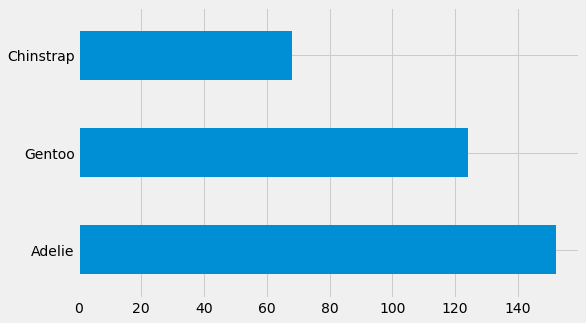

In [ ]:
data['species'].value_counts().plot(kind='barh')
plt.show()

It can be observed that unlike the Iris dataset, this data contains different number of entries for each species

<h1 style="font-size:40px">Filling in missing values</h1>

In [ ]:
#checking number of null values in the data
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Dropping the 2 rows with null values for all variables

data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [ ]:
#imputing the null values in sex with its mode

data['sex'] = data['sex'].fillna('MALE')

In [ ]:
#dropping the 336th row due to its faulty value in sex variable

data.drop(data[data['sex']=='.'].index, inplace=True)

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,200.868035,4199.780059
std,5.467516,1.976124,14.055255,802.300201
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data.shape

(341, 7)

In [ ]:
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
data.tail(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


<h1 style="font-size:40px">Distribution of the variables</h1>

Culmen Length Distribution


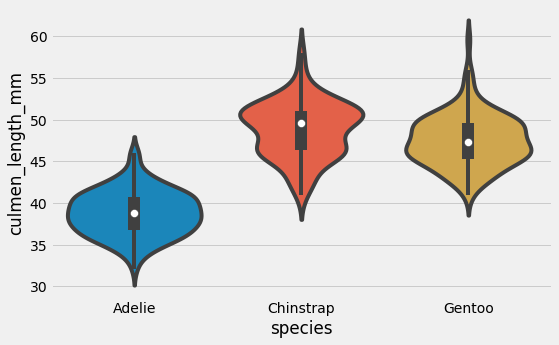

In [ ]:
print('Culmen Length Distribution')
sns.violinplot(data=data, x="species", y="culmen_length_mm", size=8)
plt.show()

Culmen Depth Distribution


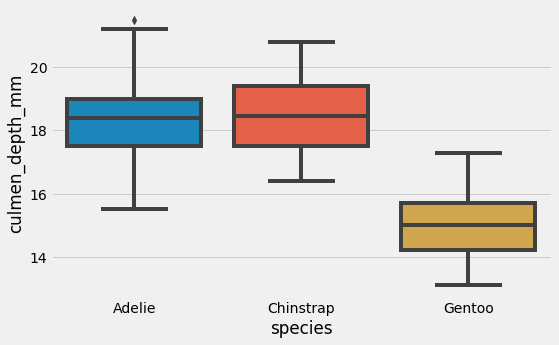

In [ ]:
print('Culmen Depth Distribution')
sns.boxplot(data=data, x="species", y="culmen_depth_mm")
plt.show()

Culmen Depth Distribution


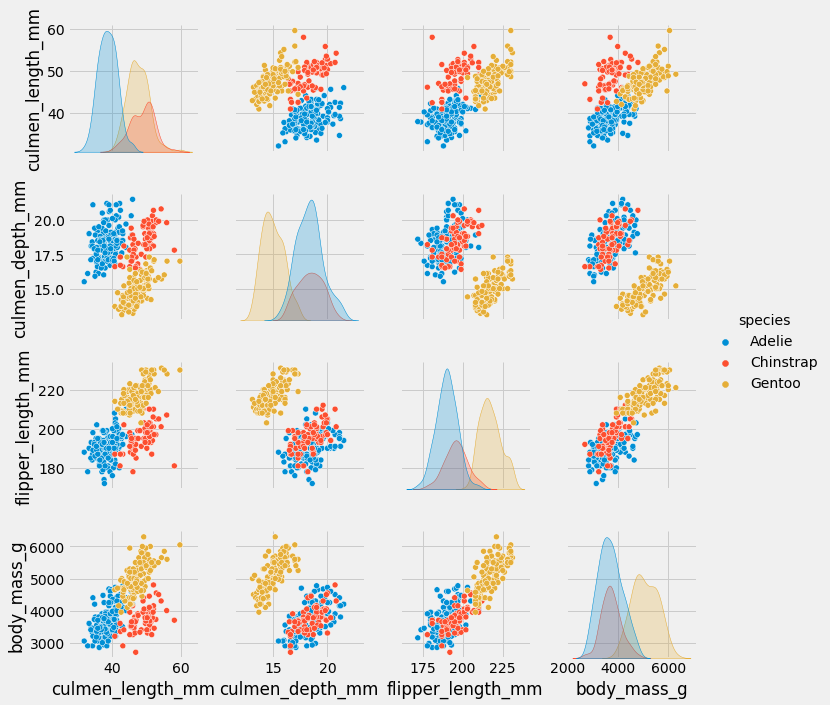

In [ ]:
print('Culmen Depth Distribution')
sns.pairplot(data=data, hue="species")

Flipper Length Distribution


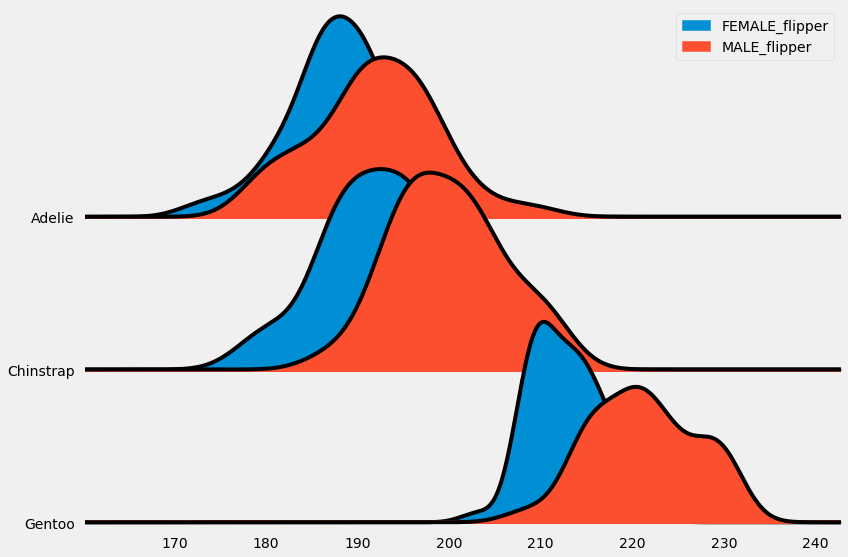

In [ ]:
print('Flipper Length Distribution')
df = data.copy()
df["MALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "MALE" else np.nan, axis = 1)
df["FEMALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "FEMALE" else np.nan, axis = 1)
fig, axes = joypy.joyplot(df, 
                          column=['FEMALE_flipper', 'MALE_flipper'],
                          by = "species",
                          ylim = 'own',
                          figsize = (12,8), 
                          legend = True
                         )

Body Mass Distribution


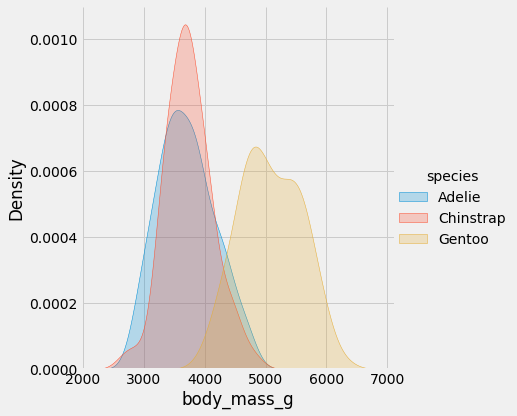

In [ ]:
print('Body Mass Distribution')
sns.FacetGrid(data, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

<h1 style="font-size:40px">Correlation of the variables</h1>

culmen_length vs culmen_depth


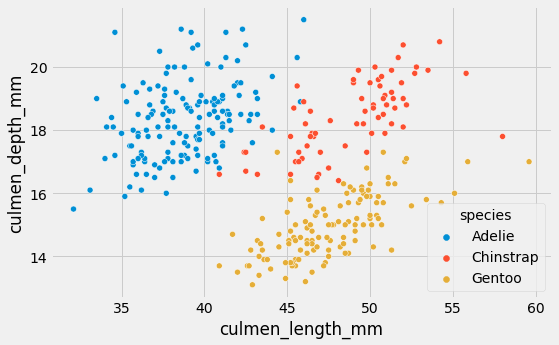

In [ ]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

culmen_length vs flipper_length


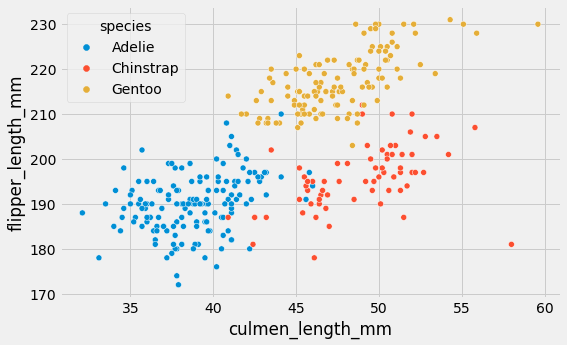

In [ ]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs flipper_length


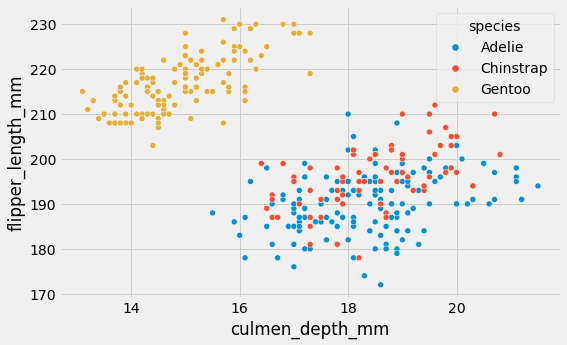

In [ ]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=data, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs body_mass


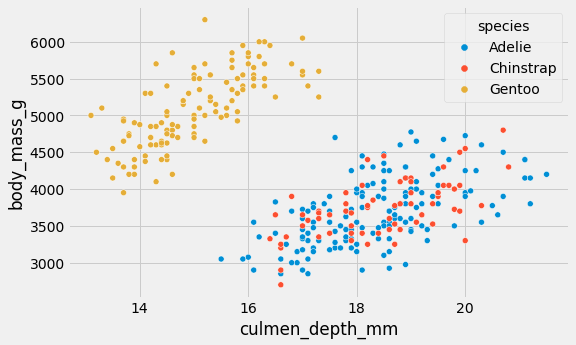

In [ ]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs body_mass


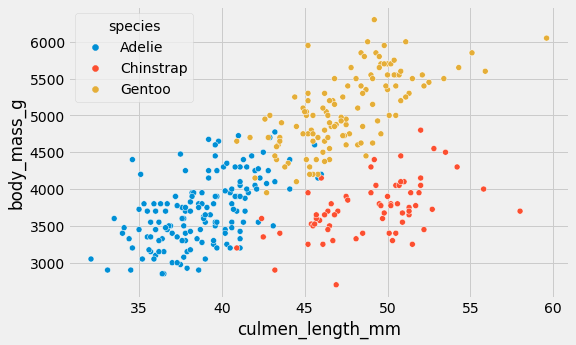

In [ ]:
print('culmen_length vs body_mass')
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()

flipper_length vs body_mass


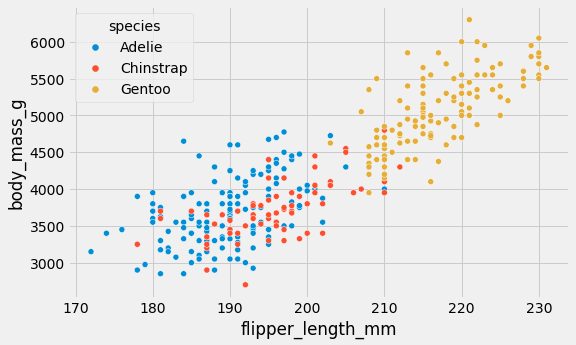

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

Pairplot


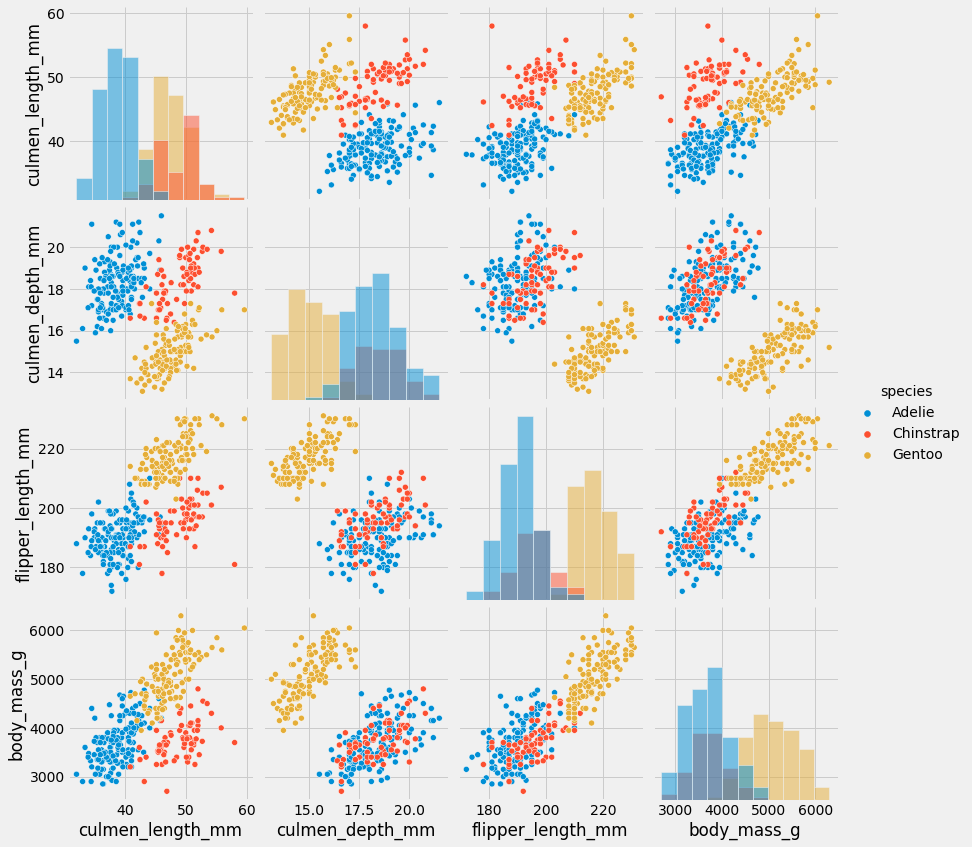

In [ ]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

<h1 style="font-size:40px">Extreme values of the variables</h1>

Which island consists of most Penguins?
Answer: Biscoe


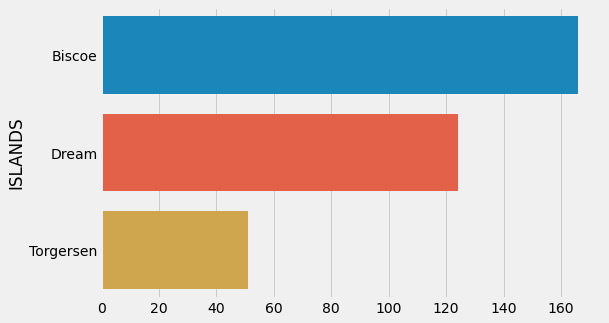

In [ ]:
print('Which island consists of most Penguins?')
print('Answer: Biscoe')
df = data['island'].value_counts().reset_index()

fig = sns.barplot(data=df, x='island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()

Which species have highest culmen_length?
Answer: Chinstrap(male and female)


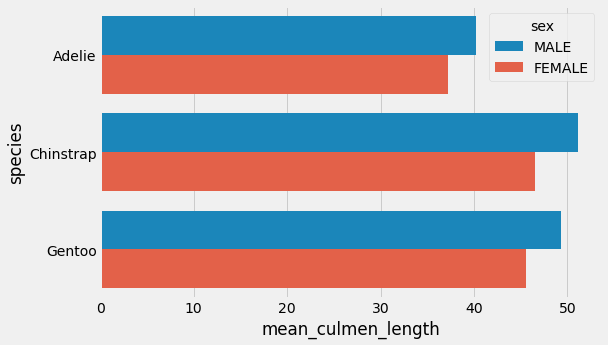

In [ ]:
print('Which species have highest culmen_length?')
print('Answer: Chinstrap(male and female)')
df = data.loc[:,['species','culmen_length_mm','sex']]
df['mean_culmen_length'] = df.groupby(['species','sex'])['culmen_length_mm'].transform('mean')
df = df.drop('culmen_length_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_culmen_length', y='species', hue='sex')
plt.show()

Which species have highest culmen_depth?
Answer: Chinstrap(male and female)


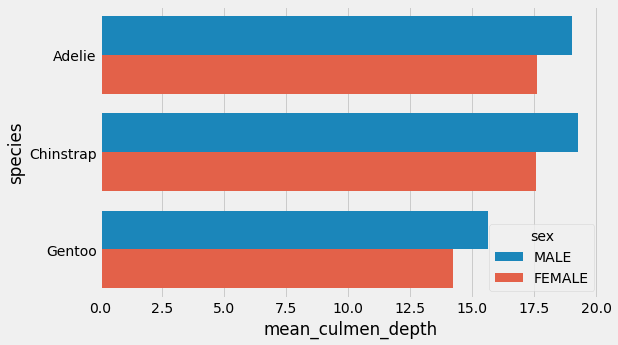

In [ ]:
print('Which species have highest culmen_depth?')
print('Answer: Chinstrap(male and female)')
df = data.loc[:,['species','culmen_depth_mm','sex']]
df['mean_culmen_depth'] = df.groupby(['species','sex'])['culmen_depth_mm'].transform('mean')
df = df.drop('culmen_depth_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_culmen_depth', y='species', hue='sex')
plt.show()

Which species have highest flipper_length?
Answer: Gentoo(male and female)


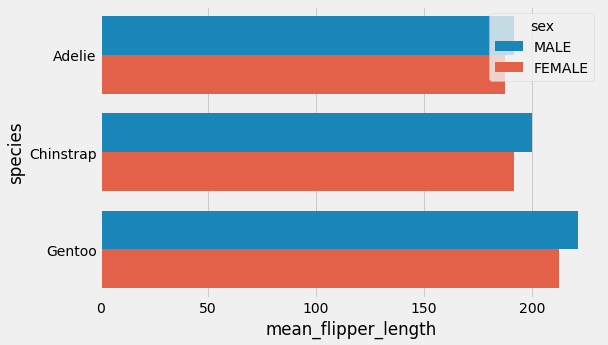

In [ ]:
print('Which species have highest flipper_length?')
print('Answer: Gentoo(male and female)')
df = data.loc[:,['species','flipper_length_mm','sex']]
df['mean_flipper_length'] = df.groupby(['species','sex'])['flipper_length_mm'].transform('mean')
df = df.drop('flipper_length_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_flipper_length', y='species', hue='sex')
plt.show()

Which species have highest body_mass?
Answer: Gentoo(male and female) - Highly diverse values noticed


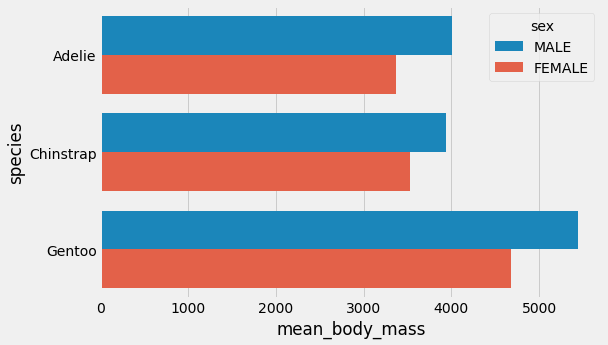

In [ ]:
print('Which species have highest body_mass?')
print('Answer: Gentoo(male and female) - Highly diverse values noticed')
df = data.loc[:,['species','body_mass_g','sex']]
df['mean_body_mass'] = df.groupby(['species','sex'])['body_mass_g'].transform('mean')
df = df.drop('body_mass_g', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_body_mass', y='species', hue='sex')
plt.show()

<h1 style="font-size:40px">Creating classifier for gender prediction</h1>

Since the missing values are already we don't need to worry about that. Next step is to encode the categorical variables.

I am setting 'sex' as the target variable. So the categorical variables to be encoded are 'species' and 'island'

In [ ]:
df = data.copy()
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

Lets label encode the target variable as well. 

I won't be using any fit transform from the scikit learn api rather i will be using a primitive mapping.

In [ ]:
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df['sex'] = df['sex'].apply(target_encode)

In [ ]:
#separating X and y

X = df.drop('sex', axis=1)
y = df['sex']

In [ ]:
X.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1


In [ ]:
# scaling the data

from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
X

array([[-0.88290872,  0.78276694, -1.41564362, ..., -0.97394632,
        -0.75592895,  2.38459106],
       [-0.80964185,  0.12394677, -1.05938201, ..., -0.97394632,
        -0.75592895,  2.38459106],
       [-0.66310812,  0.42801762, -0.41811113, ..., -0.97394632,
        -0.75592895,  2.38459106],
       ...,
       [ 1.18688028, -0.73758731,  1.50570154, ...,  1.02675064,
        -0.75592895, -0.41935912],
       [ 0.234411  , -1.19369358,  0.79317833, ...,  1.02675064,
        -0.75592895, -0.41935912],
       [ 1.09529669, -0.53487341,  0.86443065, ...,  1.02675064,
        -0.75592895, -0.41935912]])

In [ ]:
#splitting the data 80% data training, 20% data testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

In [ ]:
# model fitting and prediction

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
# checking performance of model

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[34  1]
 [ 3 31]]


In [ ]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.97      0.91      0.94        34

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



ROC CURVE


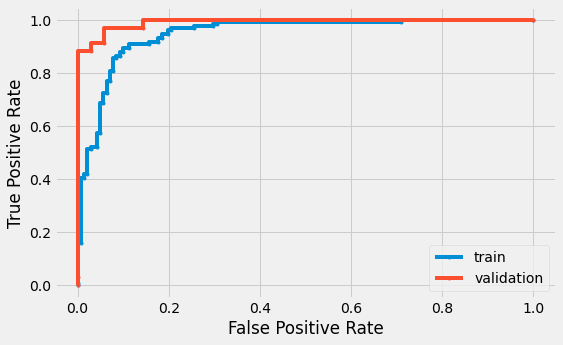

In [ ]:
# ROC CURVE

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### So the model achieved an accuracy of 94%.

<h1 style="font-size:40px">Clustering the species</h1>

In [ ]:
df = data.copy()

CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


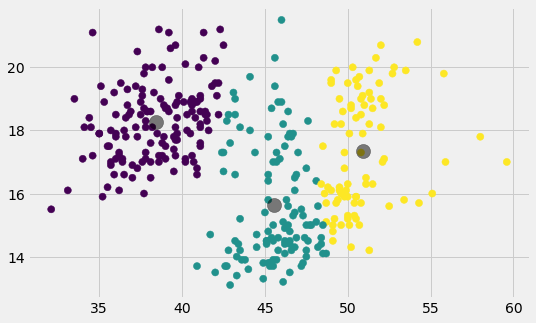

In [ ]:
print('CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH')
X = df[['culmen_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ #show the centroid
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH


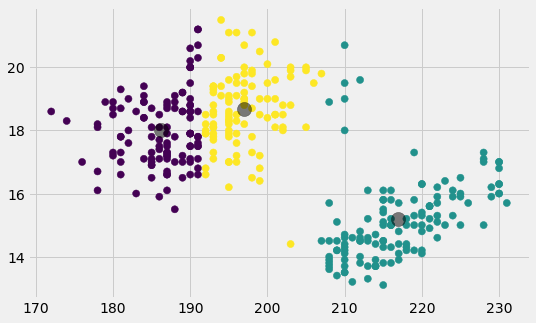

In [ ]:
print('CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH')
X = df[['flipper_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND BODY MASS


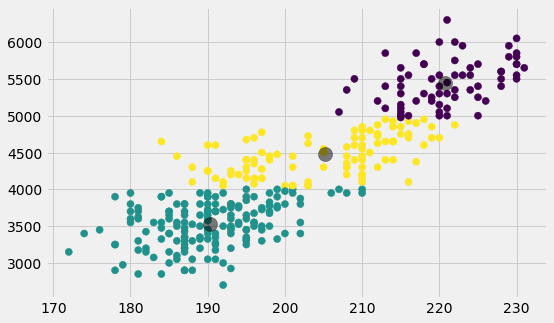

In [ ]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = df[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Installing Spark


Install Dependencies:

  1. Java 8
  2. Apache Spark with hadoop and
  3. Findspark (used to locate the spark in the system)

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Set Environment Variables:

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [16]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [17]:
!ls

Boston_Housing.csv  sample_data		       spark-3.1.1-bin-hadoop3.2.tgz
drive		    spark-3.1.1-bin-hadoop3.2


<a id='exploring-the-dataset'></a>
## Exploring the Dataset

<a id='loading-the-dataset'></a>
### Loading the Dataset

In [13]:
from google.colab import files
files.upload()

Saving Boston_Housing.csv to Boston_Housing.csv


{'Boston_Housing.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,

In [14]:
!ls

Boston_Housing.csv  sample_data		       spark-3.1.1-bin-hadoop3.2.tgz
drive		    spark-3.1.1-bin-hadoop3.2


Now that we have uploaded the dataset, we can start analyzing. For our linear regression model we need to import two modules from Pyspark i.e. Vector Assembler and Linear Regression. Vector Assembler is a transformer that assembles all the features into one vector from multiple columns that contain type double. We could have used StringIndexer if any of our columns contains string values to convert it into numeric values. Luckily, the BostonHousing dataset only contains double values, so we don't need to worry about StringIndexer for now.

In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

dataset = spark.read.csv('Boston_Housing.csv',inferSchema=True, header =True)

Notice that we used InferSchema inside read.csv mofule. InferSchema enables us to infer automatically different data types for each column.

Let us print look into the dataset to see the data types of each column:

In [19]:
dataset.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)




Next step is to convert all the features from different columns into a single column and let's call this new vector column as 'Attributes' in the outputCol.

In [21]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'Attributes')

output = assembler.transform(dataset)

#Input vs Output
finalized_data = output.select("Attributes","MEDV")

finalized_data.show()

+--------------------+----+
|          Attributes|MEDV|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



Here, 'Attributes' are in the input features from all the columns and 'medv' is the target column. Next, we should split the training and testing data according to our dataset (0.8 and 0.2 in this case).

In [23]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])


regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'MEDV')

#Learn to fit the model from training set
regressor = regressor.fit(train_data)

#To predict the prices on testing set
pred = regressor.evaluate(test_data)

#Predict the model
pred.predictions.show()

+--------------------+----+------------------+
|          Attributes|MEDV|        prediction|
+--------------------+----+------------------+
|[0.00906,90.0,2.9...|32.2| 31.38059722521073|
|[0.01301,35.0,1.5...|32.7| 29.88219782487785|
|[0.01311,90.0,1.2...|35.4|31.575725867338534|
|[0.01381,80.0,0.4...|50.0|  40.5004888503516|
|[0.01778,95.0,1.4...|32.9|30.757432152308056|
|[0.01951,17.5,1.3...|33.0|23.319007482106965|
|[0.02763,75.0,2.9...|30.8|31.775824364911657|
|[0.03049,55.0,3.7...|31.2|28.659259777890114|
|[0.03306,0.0,5.19...|20.6|22.433548591885817|
|[0.03578,20.0,3.3...|45.4| 38.12971433056583|
|[0.03584,80.0,3.3...|23.5|30.602217077365452|
|[0.03615,80.0,4.9...|27.9|  32.3325775346228|
|[0.04294,28.0,15....|20.6| 26.87767551923256|
|[0.04297,52.5,5.3...|24.8| 26.84250315172646|
|[0.04301,80.0,1.9...|18.2|15.612211442716074|
|[0.04417,70.0,2.2...|24.8| 30.68180364752492|
|[0.04527,0.0,11.9...|20.6|22.477951227672257|
|[0.0456,0.0,13.89...|23.3| 26.71764395896644|
|[0.04666,80.

We can also print the coefficient and intercept of the regression model by using the following command:

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)


## Basic Statistical Analysis

Once we are done with the basic linear regression operation, we can go a bit further and analyze our model statistically by importing RegressionEvaluator module from Pyspark.

In [26]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="MEDV", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)



RMSE: 4.811
MSE: 23.148
MAE: 3.562
r2: 0.777
